## ECE 143 INDIVIDUAL PROJECT

Name: Yancong Deng

PID: A10971125




Please Enter region's width: 10
Please Enter region's length: 10
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]]
[2 8]
[8 9]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[2 8]


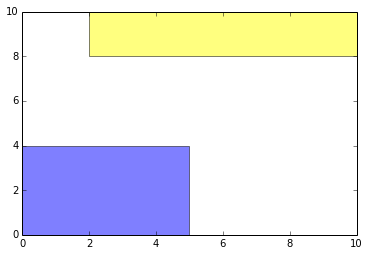

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import numpy as np
import random

def user_input():
    '''
    ask user to enter region's width and length
    >>region_width = interger
    >>region_length = interger
    >>recursively call user_input() when input is not interger
    '''  
    region_width=0
    region_length=0
    try:
        region_width = input("Please Enter region's width: ")
        assert isinstance(region_width, int)
        assert region_width>0
        region_length = input("Please Enter region's length: ")
        assert isinstance(region_length, int)
        assert region_length>0
        return region_width,region_length
    except: 
        print "Please Enter interger > 0"
        return user_input()

def generate_region(region_width,region_length):
    '''
    draw retangle region based on user input region_width and region_length
    set initial tower located at origin (0,0) with random width and length
    Note: Tower must completely within the defined region
    otherwise, need to regenerate width and length
    
    Function input:
    >>region_width
    >>region_length
    
    Plot: shown retangle region and output initail retangle tower.
    '''
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    
    plt.figure()
    plt.xlim(0, region_length)
    plt.ylim(0, region_width)
    #plt.gca().add_patch(patches.Rectangle((0, 0),0.5,0.5,color='yellow'))
    #initial origin = [0,0]
    origin = np.array([0,0])
    #initial dimension
    region = np.zeros((region_width,region_length))
    dim = generate_tower_dimension(origin,region_width,region_length)
    region[0:dim[0],0:dim[1]] = 1
    print np.rot90(region)
    return origin,dim, region
    #plt.gca().add_patch(patches.Rectangle((init_origin[0], init_origin[1]),init_dim[0],init_dim[1],facecolor="blue", alpha=0.5))


def generate_tower_origin(region_width,region_length):
    '''
    generate new tower origin
    return numpy object
    '''
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    origin_x = random.randrange(1, region_width, 1)
    origin_y = random.randrange(1, region_length, 1)
    return np.array([origin_x,origin_y])

def generate_tower_dimension(origin, region_width,region_length):
    '''
    generate new tower dimension
    return numpy object
    '''
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    
    tower_width = random.randrange(origin[0]+1, region_width+1, 1)
    tower_length = random.randrange(origin[1]+1, region_length+1, 1)
    return np.array([tower_width,tower_length])

def generate_tower(region_width,region_length):
    '''
    generate new tower origin and dimension
    return numpy object
    '''
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    origin= generate_tower_origin(region_width,region_length)
    tower_retangle = generate_tower_dimension(origin, region_width,region_length)
    return origin,tower_retangle
    
def plot_tower(origin,dim):
    '''
    plot tower retangle
    '''
    assert type(origin).__module__ == "numpy"
    assert type(dim).__module__ == "numpy"
    #assert isinstance(origin, list)
    #assert isinstance(dim, list)
    color_map = [ 'blue','yellow', 'grey', 'green', 'purple']
    if len(origin.shape)==1:
        x=len(origin.shape)
        plt.gca().add_patch(patches.Rectangle((origin[0],origin[1]),dim[0],dim[1],facecolor="blue", alpha=0.5))
    elif len(origin.shape)>1:
        x = origin.shape[0]
        color_ind = 0
        for i in range(x):
            if color_ind > 4:
                color_ind = 0
            plt.gca().add_patch(patches.Rectangle((origin[i][0],origin[i][1]),dim[i][0],dim[i][1],facecolor=color_map[color_ind], alpha=0.5))
            color_ind += 1
        #plt.gca().add_patch(patches.Rectangle((origin[0], origin[1]),tower_retangle[0],tower_retangle[1],facecolor="yellow",alpha=0.5))

        
def trim_retangle(region_width,region_length,origin,dim,region):
    assert type(origin).__module__ == "numpy"
    assert type(dim).__module__ == "numpy"
    assert type(region).__module__ == "numpy"
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    new_region = np.zeros((region_width,region_length))
    new_region[origin[0]:dim[0],origin[1]:dim[1]] = 1
    print np.rot90(new_region)

region_width,region_length = user_input()
init_origin,init_dim,region = generate_region(region_width,region_length)
#plot_tower(origin,dim)
tower_origin,tower_retangle = generate_tower(region_width,region_length)
print tower_origin
print tower_retangle
trim_retangle(region_width,region_length,tower_origin,tower_retangle,region)

origin = np.vstack((init_origin,tower_origin))
dim = np.vstack((init_dim,tower_retangle))
print tower_origin
plot_tower(origin,dim)
plt.show()

x = np.array([1,2])
y = np.array([1,4])
x = np.vstack((x,y))
x = np.vstack((x,y))
assert type(x).__module__ == "numpy"


In [24]:
print np.zeros((1,2))

[[ 0.  0.]]
